In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-ticks')

SMALL_SIZE = 13
MEDIUM_SIZE = 14
BIGGER_SIZE = 16

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

<ipython-input-1-9e12ee2f6dbb>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


Data Acquisition

In [2]:
#Load the CSV into a Pandas Dataframe
titanic_data = pd.read_csv('titanic.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'titanic.csv'

In [ ]:
titanic_data.head(5)

In [ ]:
titanic_data.info()

Observamos que hay valores faltantes en las columnas Age, Cabin y Embarked.

Limpieza de datos

Dado que la mayoría de los valores de la columna Cabin están faltantes, omitiremos esta columna junto con las columnas Ticket, Fare, PassengerId y Name que no utilizaremos para esta investigación inicial. Crearemos un nuevo DataFrame en caso de que queramos acceder al inicial nuevamente.

In [4]:
#Drop the unwanted columns
n_titanic_data=titanic_data.drop(['Cabin','Ticket','Name',
                                  'Fare','PassengerId'],axis=1)

NameError: name 'titanic_data' is not defined

In [ ]:
n_titanic_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


In [ ]:
n_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 48.9+ KB



Solo tenemos 714 valores de Age de los 891 entradas y 2 valores faltantes de la variable Embarked. Tendremos que decidir si omitir estos valores o imputarlos con algunos valores cuando modelamos relaciones basadas en Age o Embarked.

Imputar datos faltantes es un procedimiento complicado, y crear y evaluar un modelo de regresión para predecirlos basado en las otras variables está fuera del alcance de este análisis. Sin embargo, al usar la media o la mediana, podemos sesgar cualquier relación que estemos modelando.

Por lo tanto, elegiremos omitir los datos faltantes de Age y Embarked siempre que estemos modelando relaciones basadas en estas dos variables utilizando el método de Análisis por Casos Disponibles (donde se estudian diferentes aspectos del problema con diferentes subconjuntos de datos) y aceptaremos las limitaciones de este enfoque (falta de consistencia entre los subconjuntos analizados).

Exploración adicional - Visualizaciones

Cambiarémos las claves para hacerlas más legibles y exploraremos la composición inicial de los pasajeros.

In [ ]:
#Make another copy of the new dataframe
descript = n_titanic_data.copy()

#Change the embarked keys to better readable ones
descript.loc[:,'Embarked'].replace(['C','S','Q'],
                                      ['Cherbourg','Southampton','Queenstown'],
                                      inplace=True)
#And the survived keys
descript.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)

Crearemos una función para esta operación ya que la utilizaremos también para otras variables.

In [ ]:
# Make a function to get the composition of the variables per number of passengers
def Groupby_OneCol_comp_plot(df, col, plt_style = 'seaborn-ticks', color_palette = "coolwarm"):
    '''
    Group by col1, sort by size , return and plot the dataframe with a bar and pie plot
    '''
    gr=pd.DataFrame()
    gr['{} No'.format(col)] = df.groupby(col).size()
    gr['{} Ratio'.format(col)] = np.round(gr['{} No'.format(col)].divide(gr['{} No'.format(col)].sum())*100,0)

    print ('Total No. of {}:{}'.format(col,gr['{} No'.format(col)].sum()))

    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))

    fig=plt.figure()
    plt.axis('off')

    fig.add_subplot(121)

    ax=gr['{} No'.format(col)].plot(kind='bar', title='{} Counts'.format(col), figsize=(16,8), color=sns.color_palette())
    _ = plt.setp(ax.get_xticklabels(), rotation=0)
    for p in ax.patches: ax.annotate(np.round(p.get_height(),decimals=2),
                                     (p.get_x()+p.get_width()/2., p.get_height()),
                                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    ax.get_yaxis().set_ticks([])
    plt.xlabel('')

    fig.add_subplot(122)
    plt.axis('off')
    gr.loc[:,'{} Ratio'.format(col)].plot(kind= 'pie',
                                     autopct='%1.1f%%',shadow=False,
                                     title='{} Ratio'.format(col), legend=False, labels=None);
    sns.despine(top=True, right=True, left=True, bottom=False);

Análisis de la variable Embarked

Comenzamos con la composición de los pasajeros en función de su puerto de embarque.








Total No. of Embarked:889


<ipython-input-13-a11eb9b53b6a>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


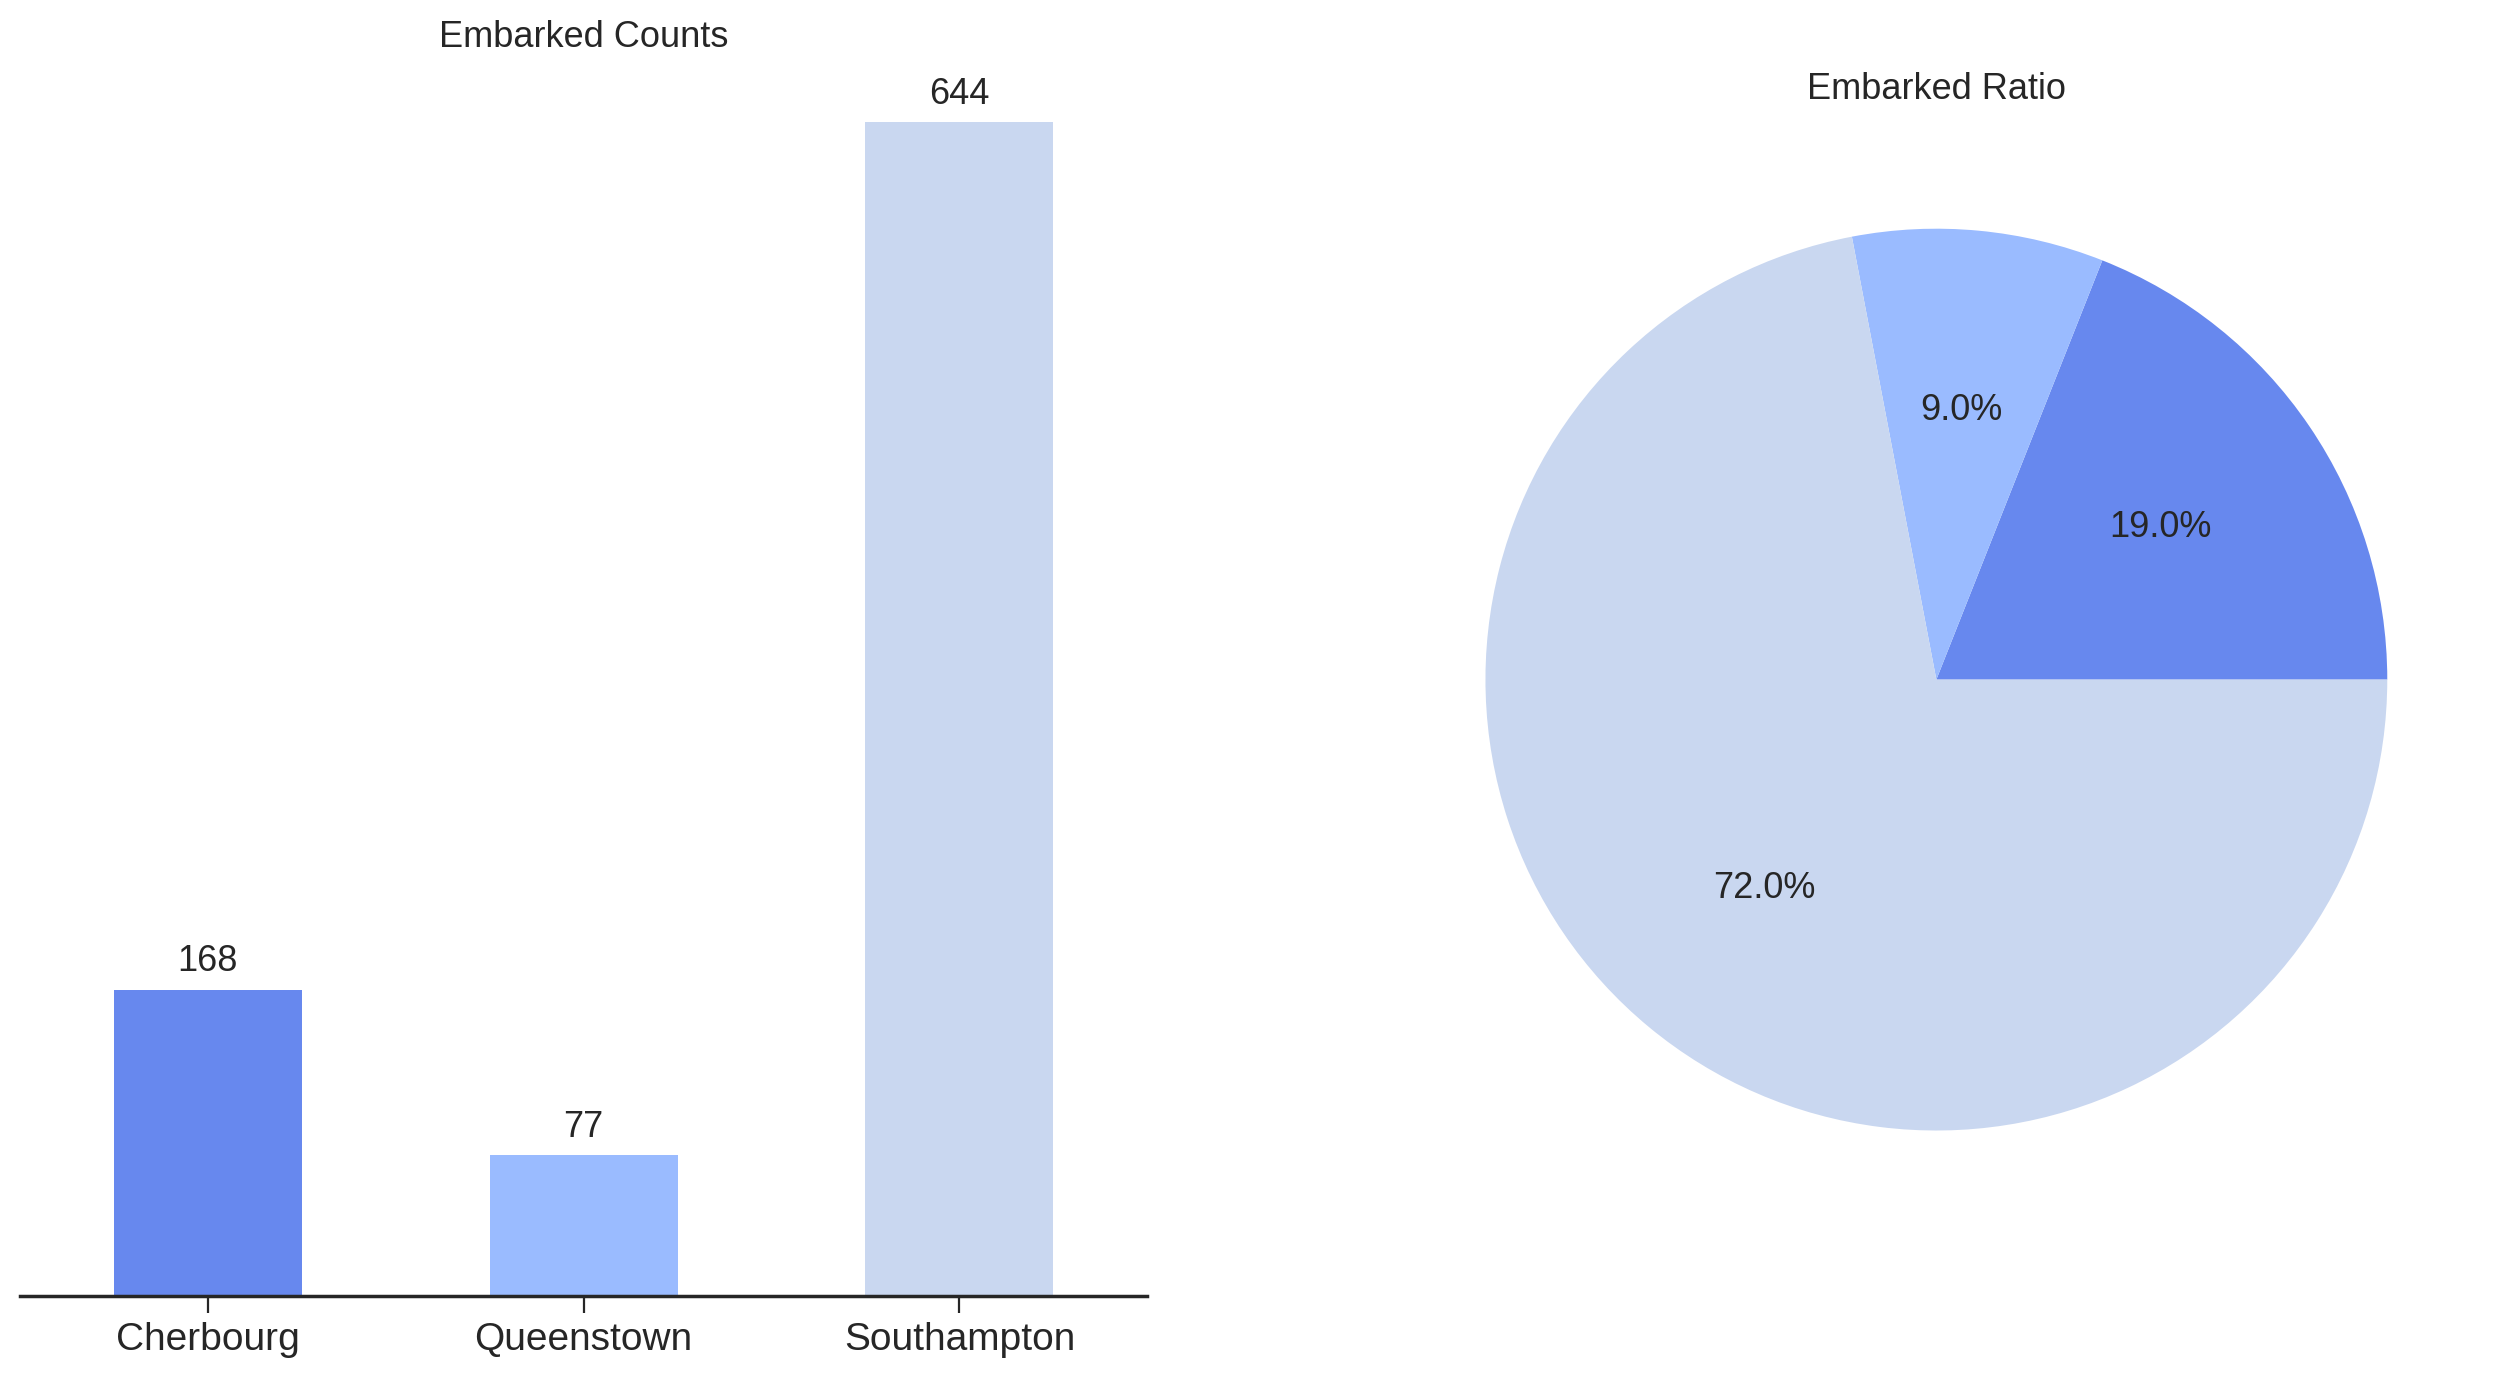

In [ ]:
Groupby_OneCol_comp_plot(descript, 'Embarked')

Vemos que la mayoría de los pasajeros (644 de 889 - 72%) embarcaron en Southampton y solo 77 pasajeros - 9% - embarcaron en Queenstown.

Examinemos los porcentajes de pasajeros que sobrevivieron, según su puerto de embarque.

Crearemos funciones para esta operación ya que las utilizaremos también para otras variables:

**Correlación de Sobrevivido con Embarked**

In [ ]:
def plot(table, legloc='upper right',
                                    plt_style = 'seaborn-ticks',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(19,10), width=0.7 ):
    grouped = table

    #Tranform to percentages
    if percentage == True:
        grouped = np.round(grouped.divide(grouped['Total'],axis=0)*100,0)
    try:
        del grouped['Total']
    except:
        pass

    # rearrange the columns
    if sorter:
        grouped = grouped[sorter]

    plt.style.use(plt_style)
    sns.set_palette(sns.color_palette(color_palette))
    ax = grouped.plot(kind=kind,stacked=stacked, figsize=figsize, width=width)
    _ = plt.setp(ax.get_xticklabels(), rotation=0)  # Rotate labels
    plt.legend(loc=legloc) # plot the legend normally

    #annotate the bars
    if percentage == True:
      for p in ax.patches:
            ax.annotate('{}%'.format(int(np.round(p.get_height(),decimals=2))),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    else:
      for p in ax.patches:
            ax.annotate(np.round(p.get_height(),decimals=2),
                                         (p.get_x()+p.get_width()/2.,
                                          p.get_height()), ha='center', va='center',
                                        xytext=(0, 10), textcoords='offset points')
    if minimal == True:
        ax.get_yaxis().set_ticks([])
        plt.xlabel('')
        sns.despine(top=True, right=True, left=True, bottom=False);
    else:
        pass
    # set custom title
    plt.title(custom_title)

def Groupby_TwoCol_Plot(df, col1, col2, legloc='upper right',
                                    plt_style = 'ggplot',
                                    color_palette="dark",sorter=None, stacked=False,
                                    kind = 'bar', percentage = True,
                               custom_title=None, minimal=True, figsize=(14,6), width=0.6):

    #Group by Placement and Representative and unstack by Placement
    grouped = df.groupby([col2,col1]).size().unstack(col2)

    #Make a totals column sort and delete after
    grouped['Total'] = grouped.sum(axis=1)
    #grouped = grouped.sort_values('Total', ascending = False)

    plot(grouped, legloc=legloc,
                                    plt_style = plt_style,
                                    color_palette=color_palette,sorter=sorter, stacked=stacked,
                                    kind = kind , percentage = percentage,
                               custom_title=custom_title, minimal=minimal, figsize=figsize, width=width)


<ipython-input-15-a78a337c2edd>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


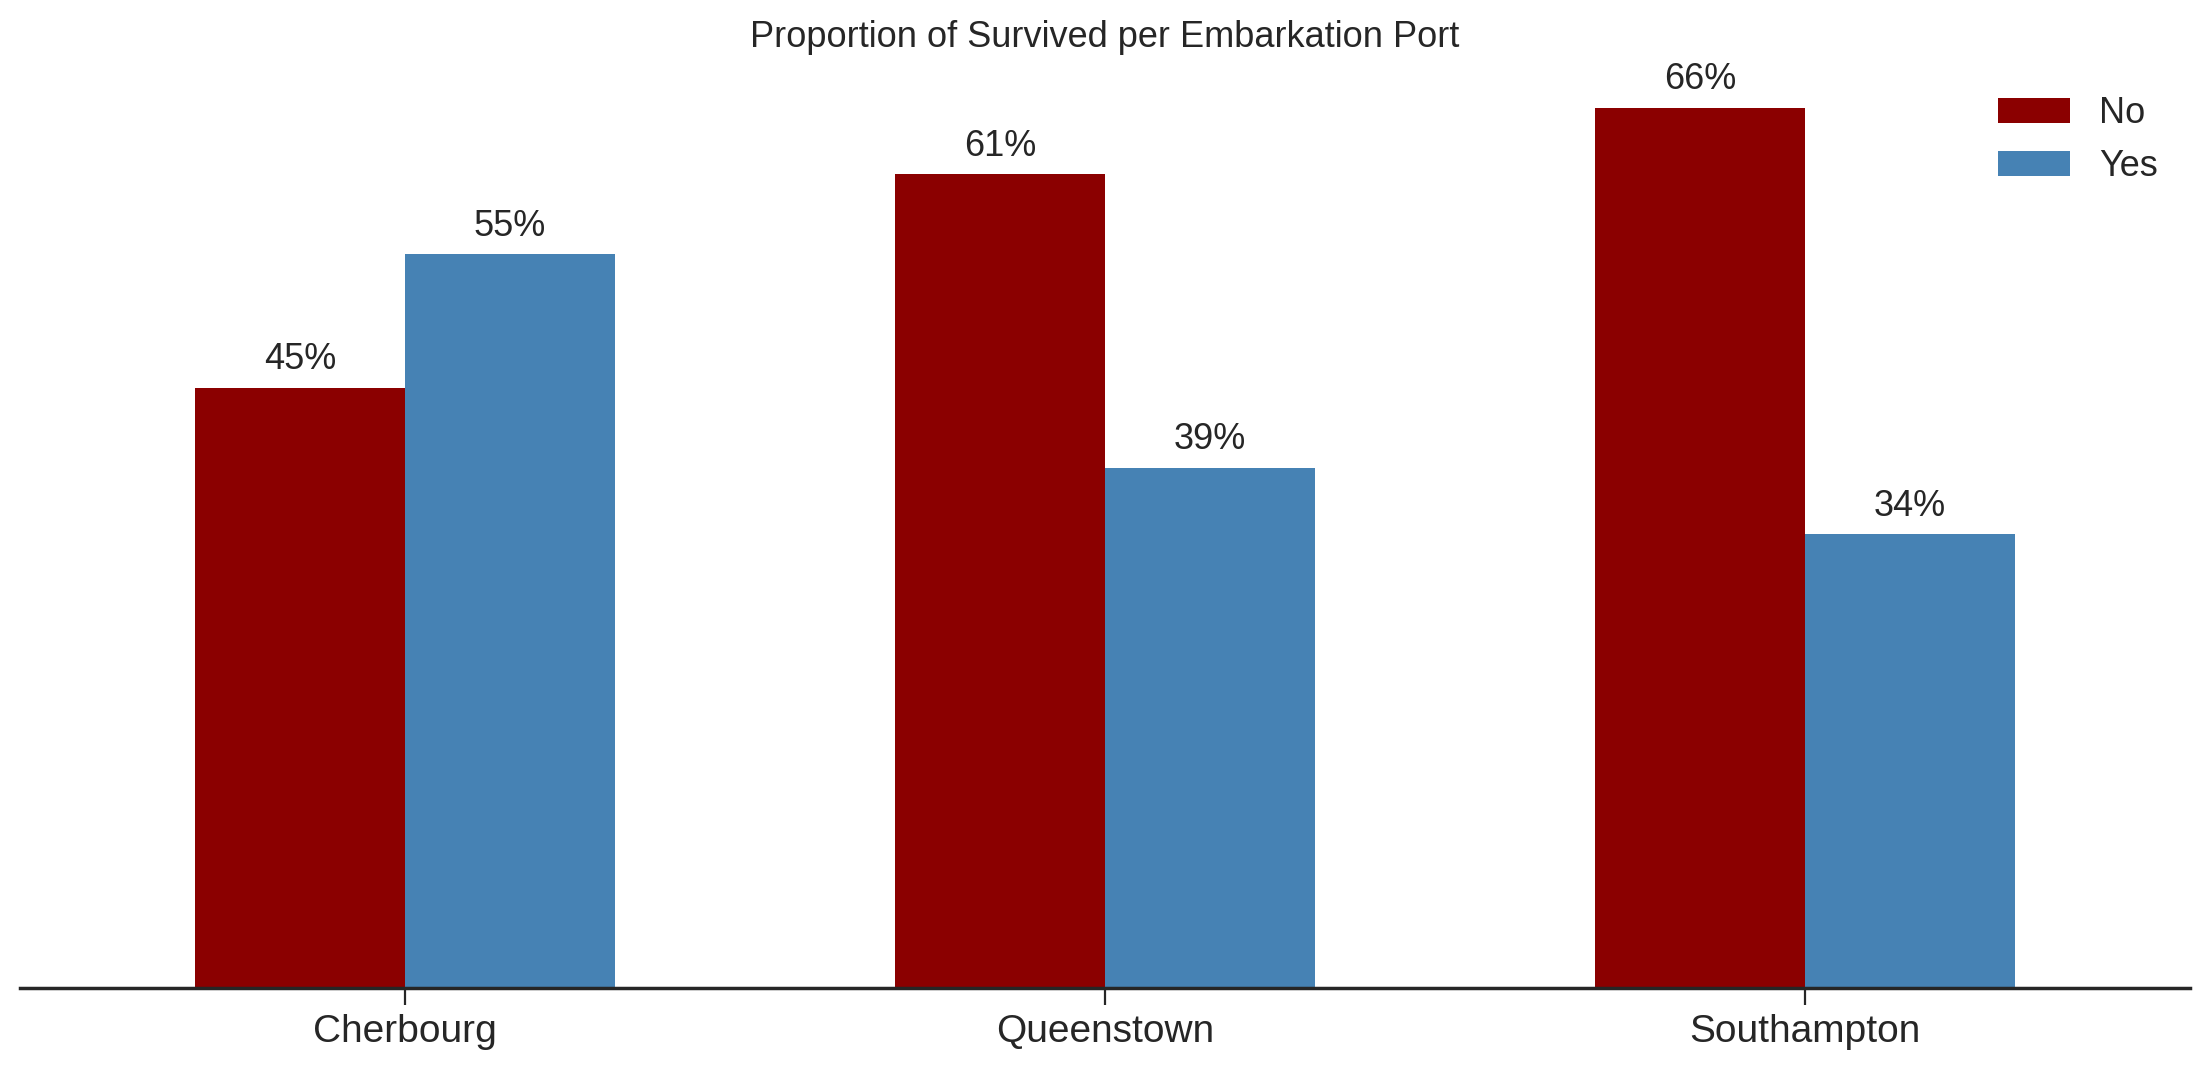

In [ ]:
Groupby_TwoCol_Plot(descript,'Embarked', 'Survived', color_palette=('darkred','steelblue'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Survived per Embarkation Port')


Vemos que el 55% de los pasajeros que embarcaron en Cherbourg sobrevivieron, en comparación con el 34% y el 39% en Southampton y Queenstown, respectivamente.

Esto es contraintuitivo a primera vista. Investigar más a fondo la composición de los pasajeros en relación con su género y su clase puede darnos más información sobre esta relación.

**Correlación de Embarked con Pclass**

<ipython-input-15-a78a337c2edd>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


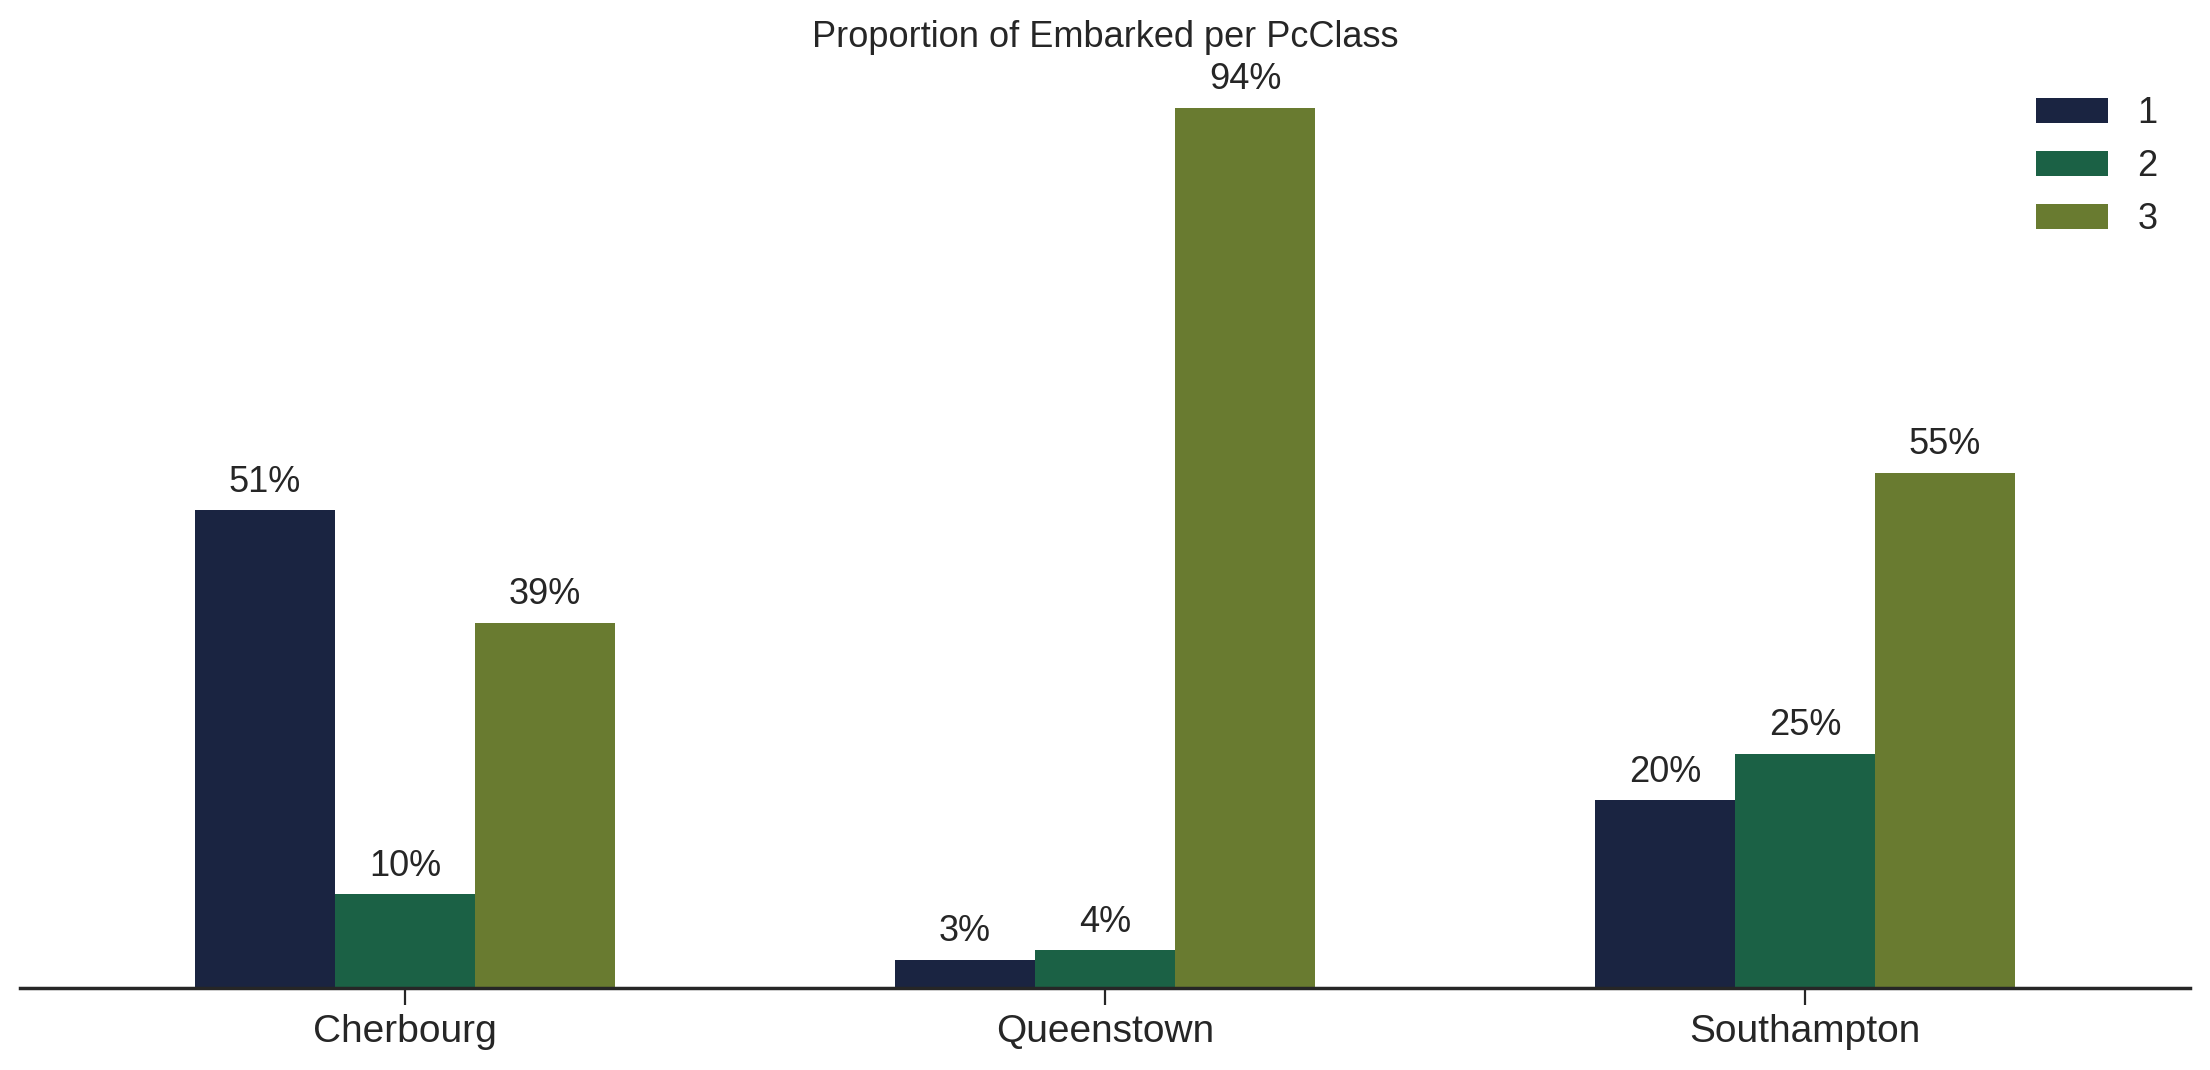

In [ ]:
#Calculate percentages of port passengers per Class
Groupby_TwoCol_Plot(descript,'Embarked', 'Pclass', color_palette=('cubehelix'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Embarked per PcClass', sorter = [1,2,3])



El 51% de los pasajeros que embarcaron en Cherbourg están en la 1ª clase, en comparación con el 20% y el 3% respectivamente para Southampton y Queenstown.

Parece que la clase puede jugar un papel en la relación entre el puerto de embarque y la supervivencia.

Examinemos más a fondo la supervivencia basada en la variable Pclass.

**Correlación de Sobrevivientes con Pclass**

<ipython-input-15-a78a337c2edd>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


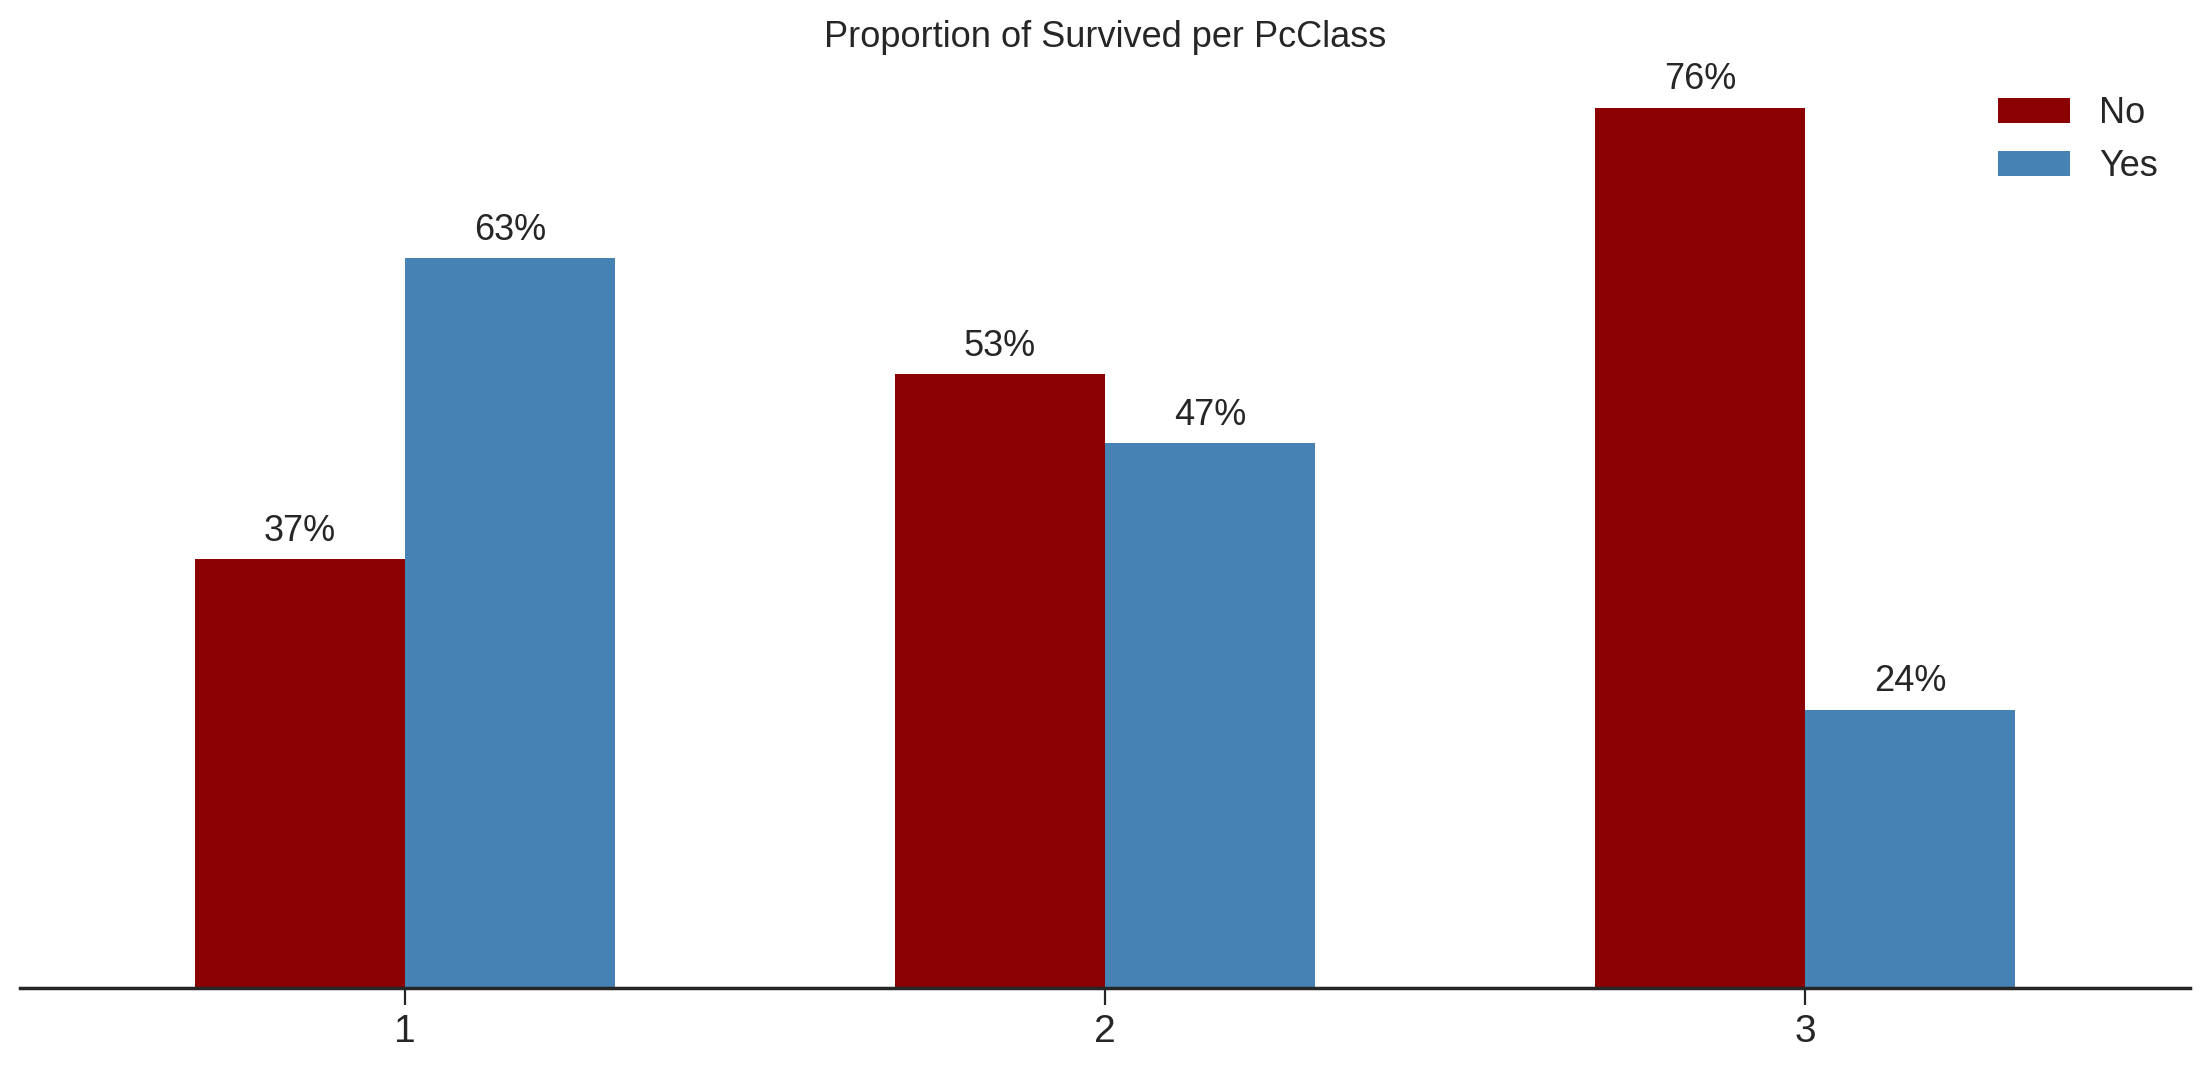

In [ ]:
Groupby_TwoCol_Plot(descript,'Pclass', 'Survived', color_palette=('darkred','steelblue'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Survived per PcClass')

El 63% de los pasajeros de 1ª clase sobrevivieron, en comparación con el 47% y el 24% para la 2ª y 3ª clase, respectivamente.

De hecho, la supervivencia parece estar correlacionada con la clase, y este podría ser el principal factor detrás de la correlación con el puerto de embarque también.

Investigaremos Embarked y su correlación con el Sexo.

**Correlación de Sexo con Embarked**

<ipython-input-15-a78a337c2edd>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


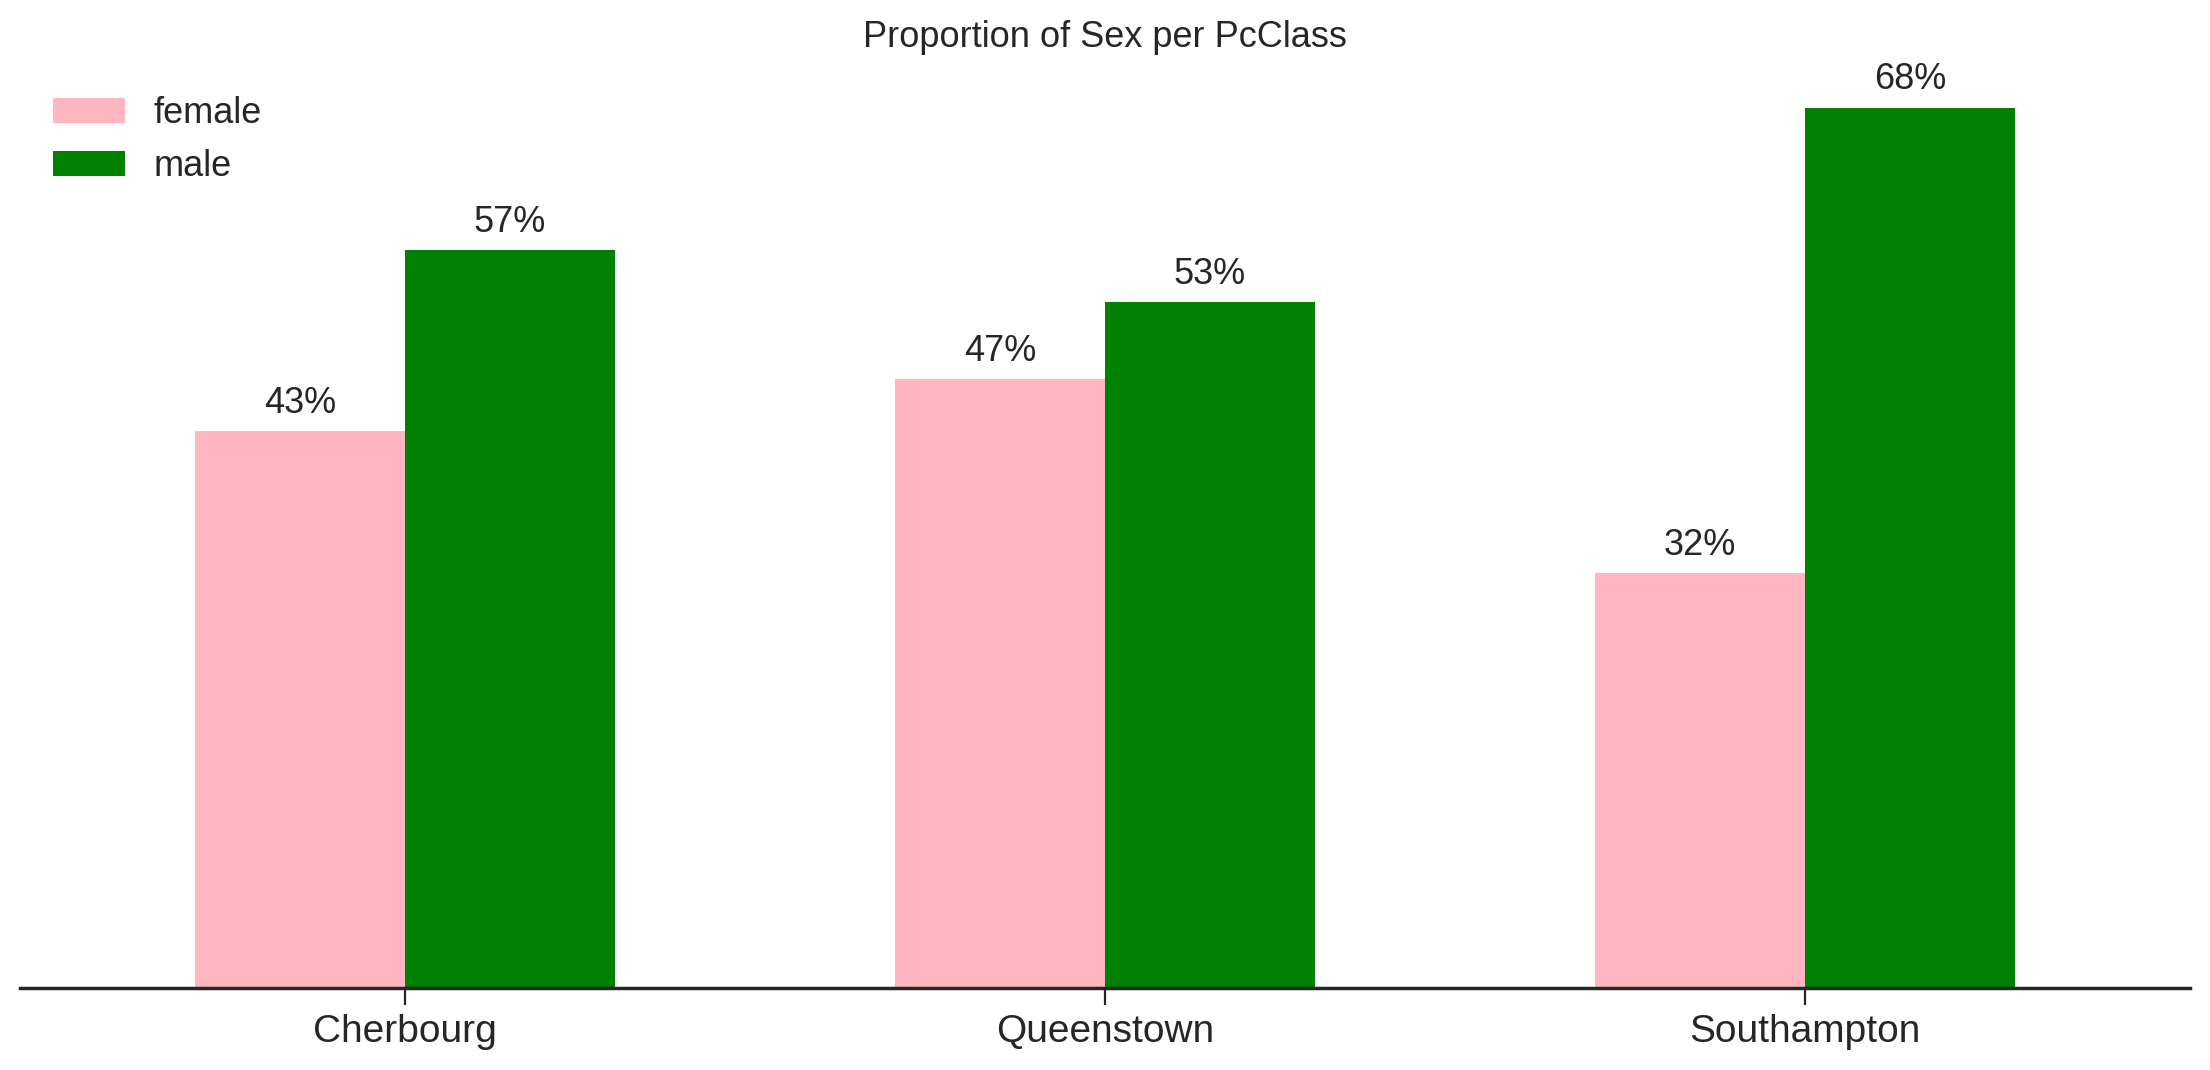

In [ ]:
#Calculate percentages of port passengers per Sex
Groupby_TwoCol_Plot(descript,'Embarked', 'Sex', color_palette=('lightpink','green'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per PcClass',
                   legloc='upper left')

No parece haber un patrón claro relacionado con el Sexo que pueda estar contribuyendo al aumento en la supervivencia de los pasajeros de Cherbourg.

Veamos la composición por Sexo de toda la población.

**Análisis de la variable Sexo**

Total No. of Sex:891


<ipython-input-13-a11eb9b53b6a>:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


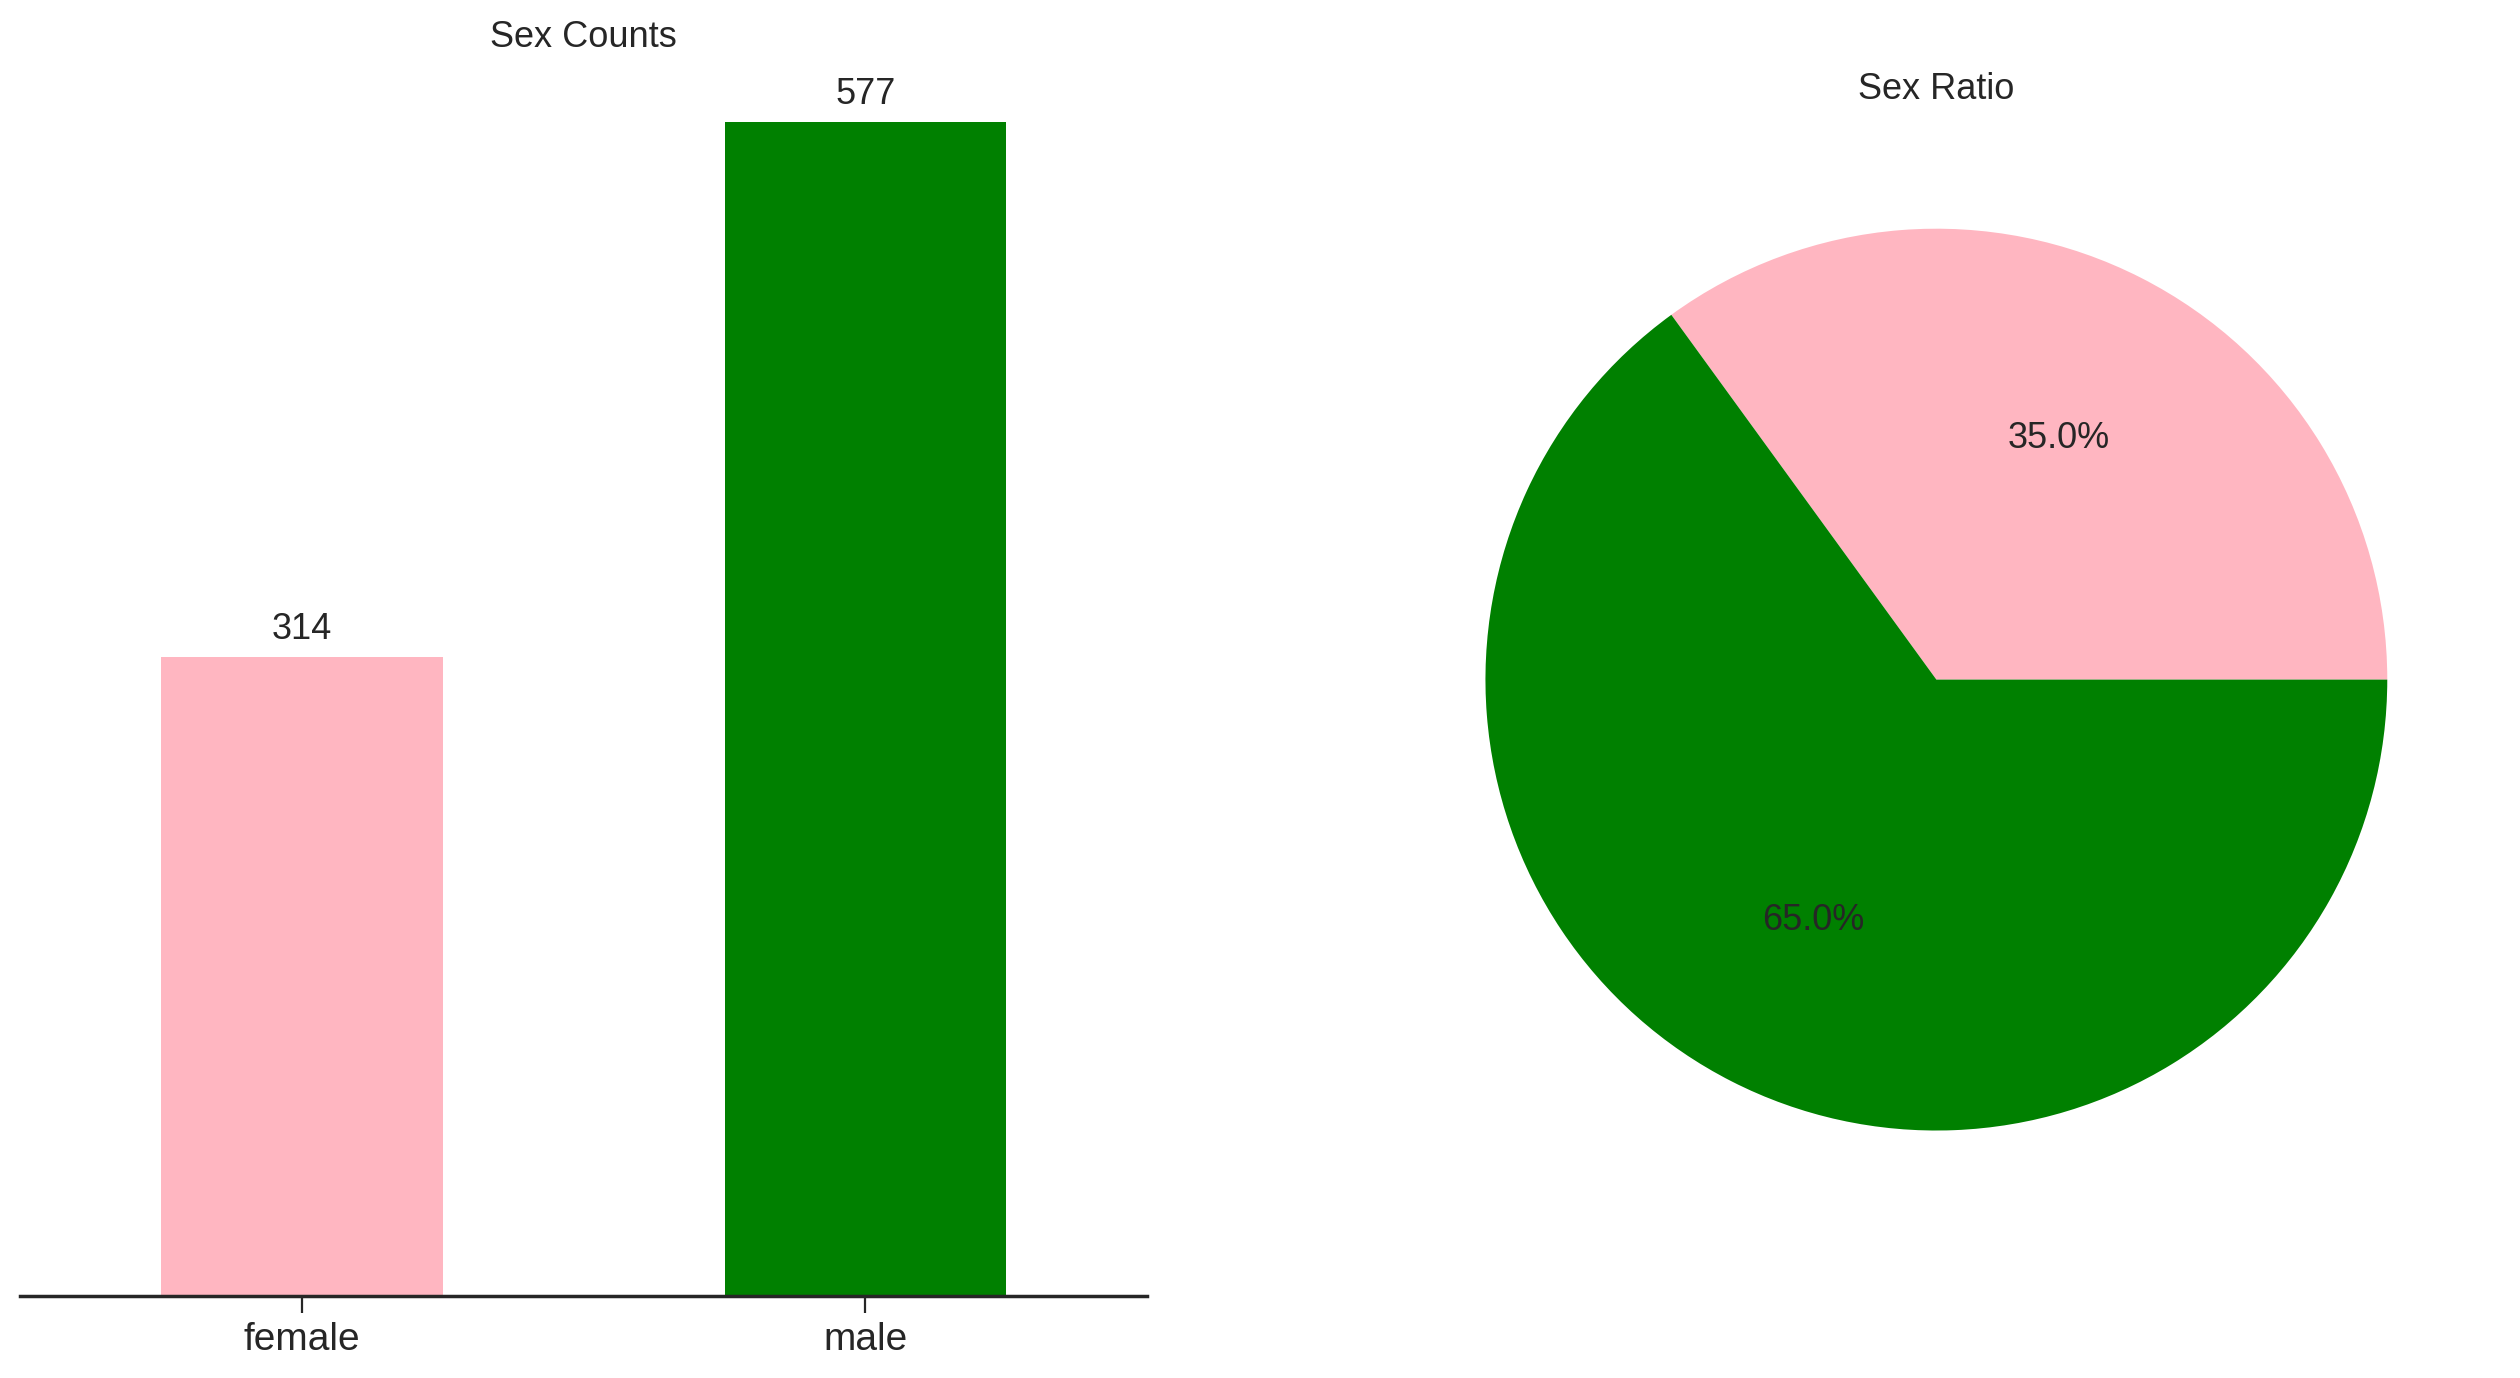

In [ ]:
Groupby_OneCol_comp_plot(descript, 'Sex', color_palette = ('lightpink','green') )

**Correlación de Sexo con Pclass**

<ipython-input-15-a78a337c2edd>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


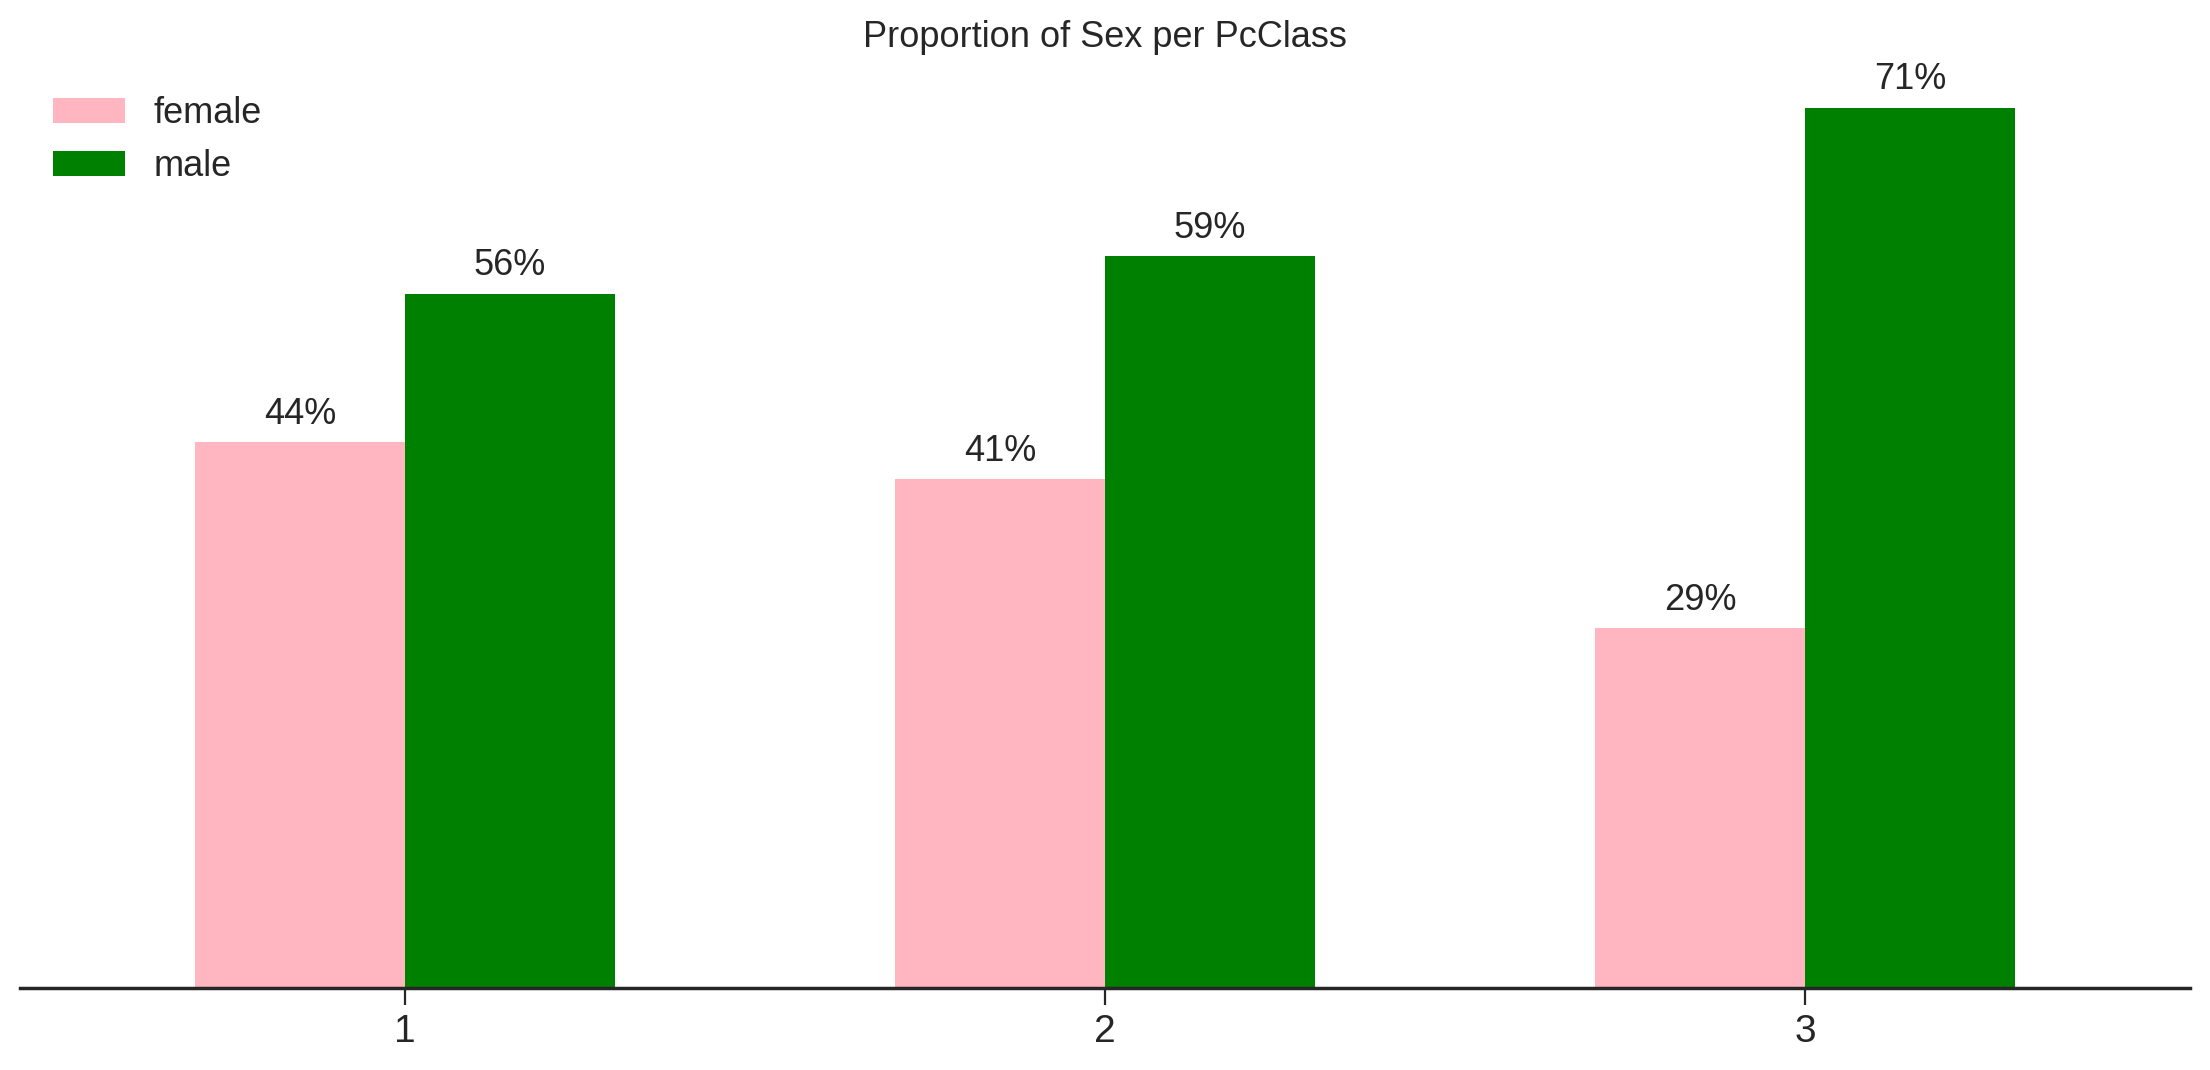

In [ ]:
#Calculate percentages of Pclass per Sex
Groupby_TwoCol_Plot(descript,'Pclass', 'Sex', color_palette=('lightpink','green'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per PcClass',
                   legloc='upper left')

Observamos que la 3ª clase tiene un porcentaje de hombres superior al promedio (71% frente a 65%).

<ipython-input-15-a78a337c2edd>:20: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(plt_style)


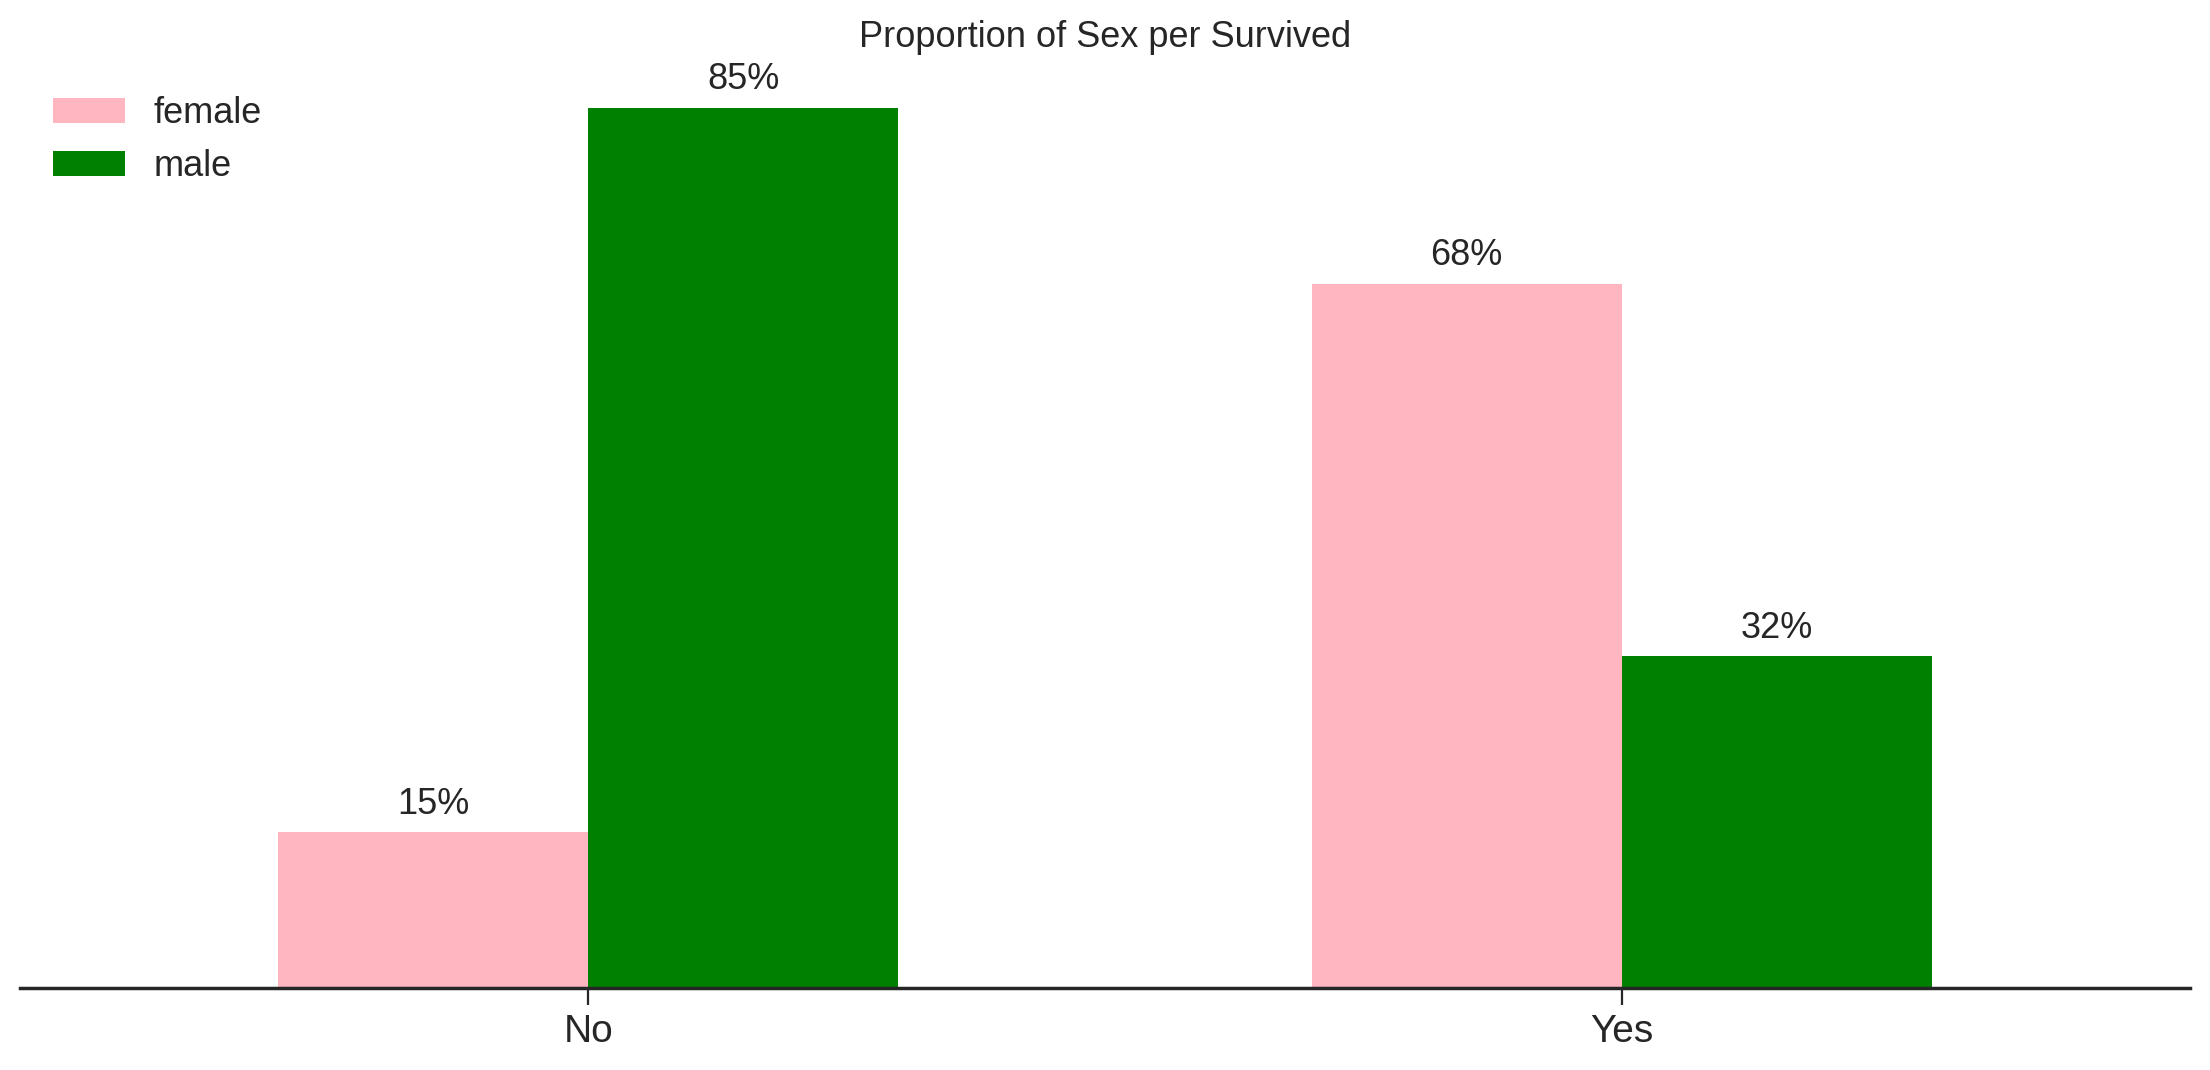

In [ ]:
Groupby_TwoCol_Plot(descript,'Survived', 'Sex', color_palette=('lightpink','green'),
                    plt_style = 'seaborn-ticks', custom_title='Proportion of Sex per Survived',
                   legloc='upper left')

El 74% de las mujeres sobrevivieron, en comparación con el 19% de los hombres. El 44% de la 1ª clase (que tenía una tasa de supervivencia del 65%) estaba compuesta por mujeres, en comparación con el 29% de la 3ª clase (con una tasa de supervivencia del 24%).

Podemos observar esta relación en el siguiente diagrama de barras de seaborn, donde las líneas negras representan los intervalos de confianza construidos utilizando el método de bootstrap.

**Correlación de Sobrevivido con Sexo y Pclass**

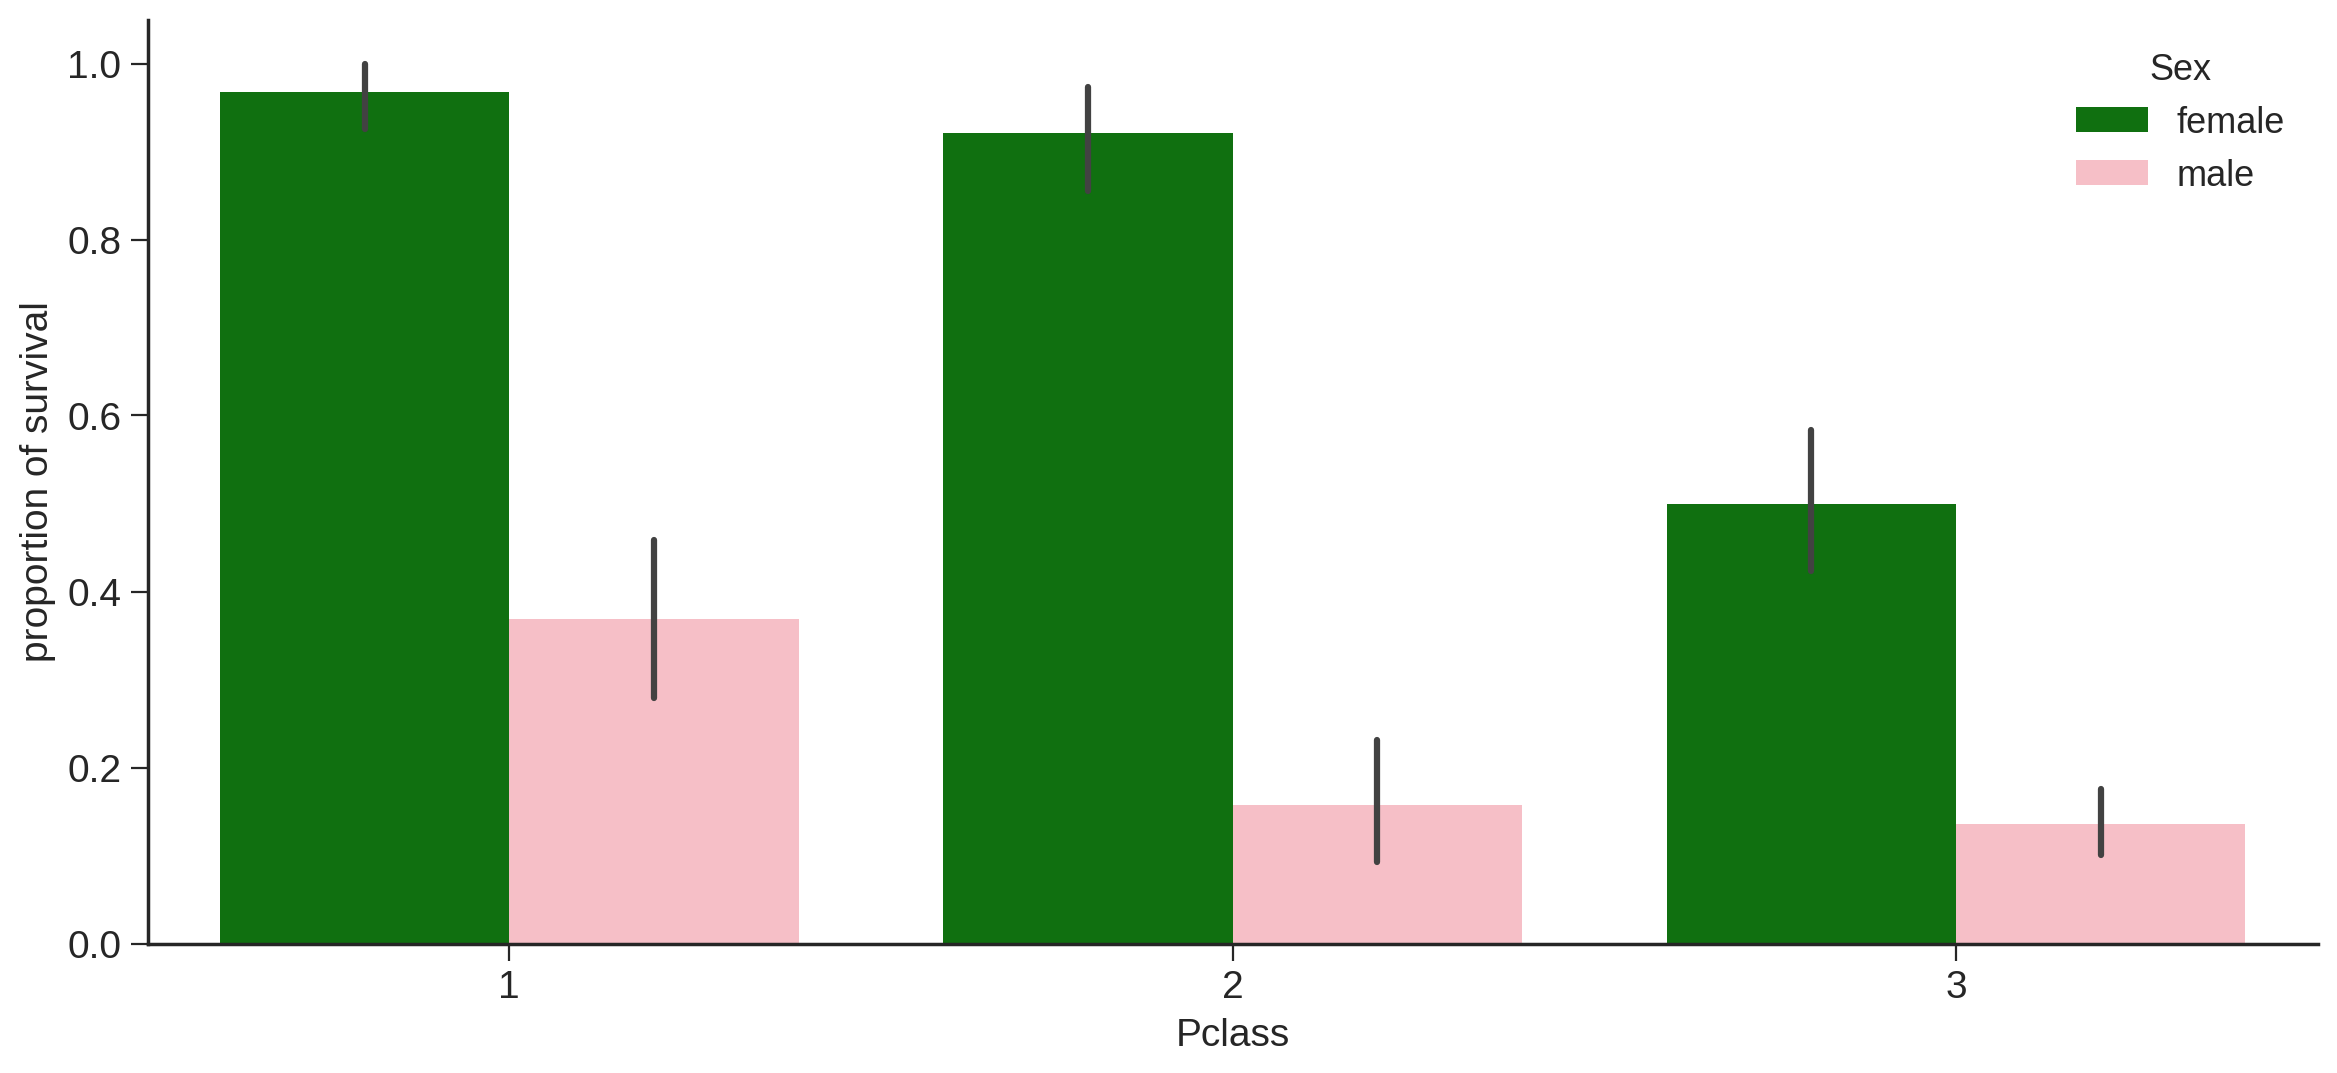

In [ ]:
plt.figure(figsize=(14,6))
sns.set_palette(sns.color_palette(('green','lightpink')))
sns.barplot(data=n_titanic_data, x="Pclass", hue='Sex', y='Survived', estimator=np.mean);
plt.ylabel('proportion of survival')
sns.despine(top=True, right=True, left=False, bottom=False);

La proporción de supervivencia para las mujeres en la primera clase fue de casi el 100% en comparación con el 50% en la tercera clase.

Se deben realizar más pruebas estadísticas, pero parece que la Edad, junto con la Clase, tiene un efecto compuesto en la supervivencia, así como en la correlación de otras variables con la supervivencia.

**Análisis de la variable Edad**

Ahora examinemos la distribución de edad de los pasajeros y cómo la Edad afectó sus posibilidades de supervivencia.

Comenzaremos con un gráfico de toda la población.

In [ ]:
#Make a dataframe for non missing 'Age'values
not_missing = n_titanic_data[(n_titanic_data['Age'].notnull())]

#And replace the survived keys
not_missing.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)

<ipython-input-24-c8ba6c28e656>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_missing.loc[:,'Survived'].replace([0,1],['No','Yes'],inplace=True)


In [ ]:
print ('No. of Passengers with not missing Age Values:{}'.format(len(not_missing)))

No. of Passengers with not missing Age Values:714


<ipython-input-26-ad2f44e2f86d>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(not_missing['Age'],bins=11)


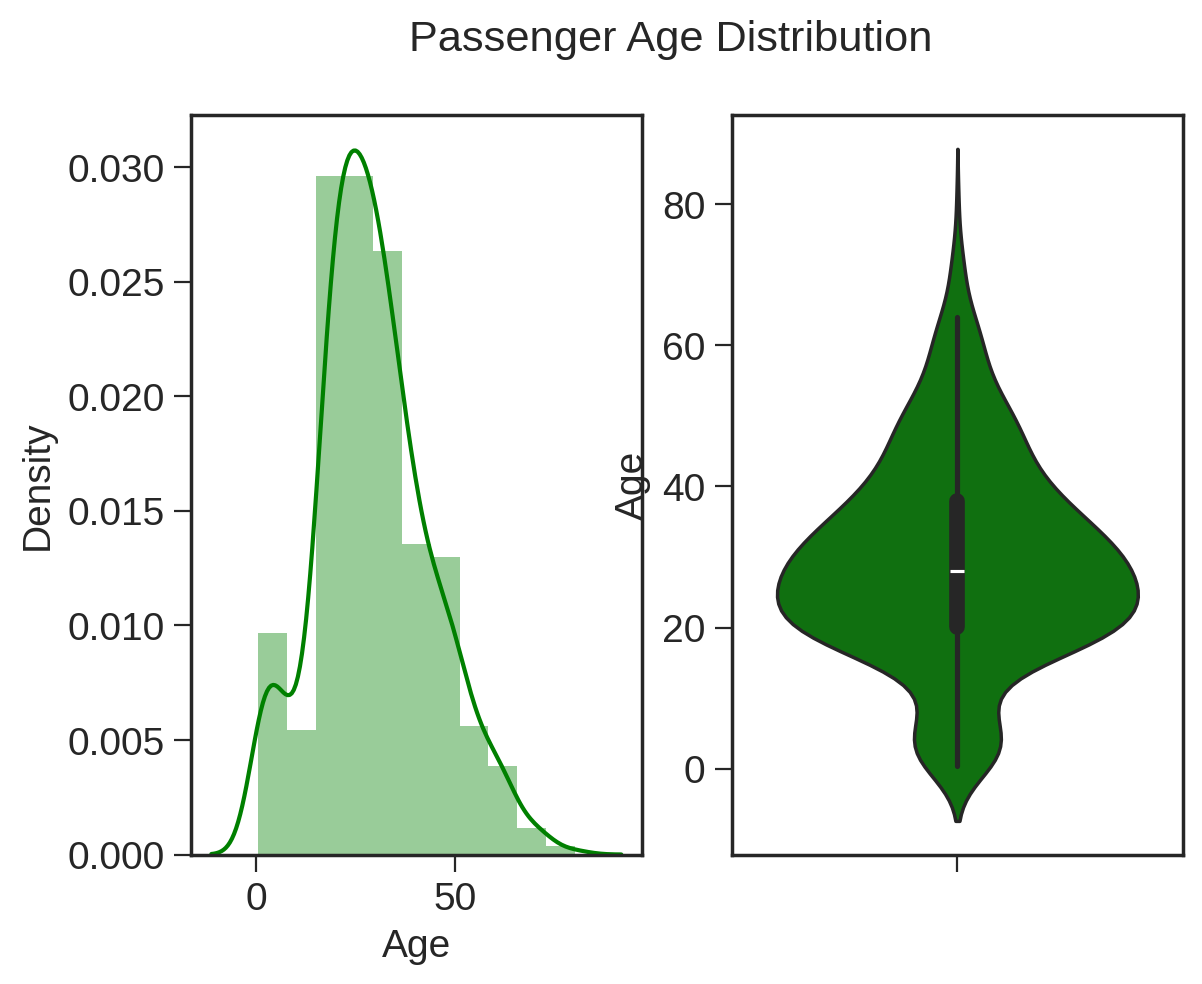

In [ ]:
ax=plt.figure()
plt.suptitle('Passenger Age Distribution')
ax.add_subplot(121)
sns.distplot(not_missing['Age'],bins=11)
ax.add_subplot(122)
sns.violinplot(not_missing['Age']);

In [ ]:
# Get summary descriptive statistics
v= pd.DataFrame(not_missing['Age'].describe())

#Change the index labels and round the values reported
v.index = ['Population Size', 'Mean', 'Std. Deviation', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
v = v.round(decimals=3)
v

,Age
Population Size,714.000
Mean,29.699
Std. Deviation,14.526
Min,0.420
25% Qt,20.125
Median,28.000
75% Qt,38.000
Max,80.000


Y la distribución de densidad y el diagrama de caja de la variable Edad según la supervivencia.

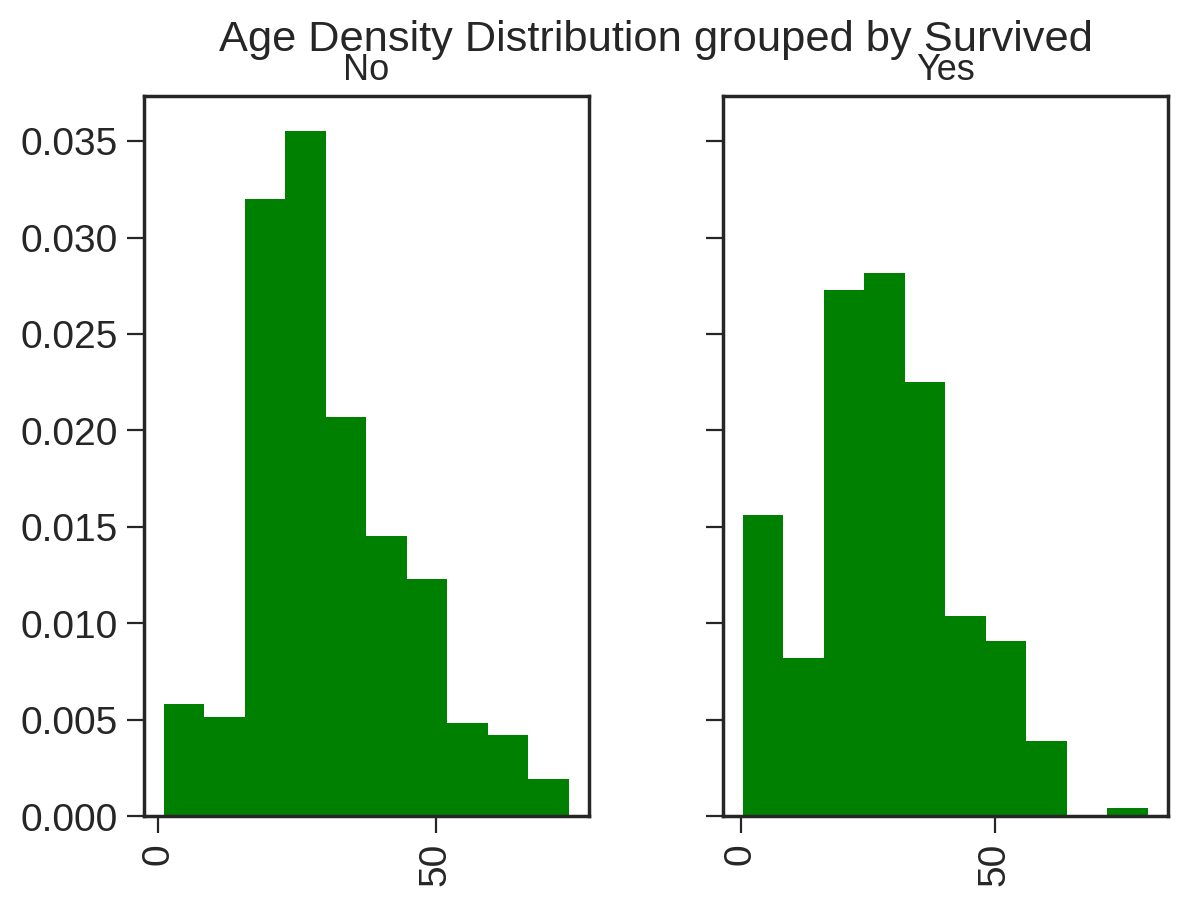

In [ ]:
not_missing.hist(column="Age",by="Survived",sharey=True,density=True) # Replace normed with density
plt.suptitle('Age Density Distribution grouped by Survived');

Observamos que el porcentaje de niños menores de 10 años que sobrevivieron fue significativamente más alto, y casi nadie mayor de 70 años sobrevivió. Nos gustaría examinar si esto fue por casualidad o por alguna otra razón subyacente (como la regla de "Mujeres y niños primero").

In [ ]:
#Make a datframe with the sample populations
age = pd.DataFrame()
age['all'] = not_missing['Age']
not_survived = age['Not-survived'] = not_missing['Age'][not_missing['Survived']=='No']
survived = age['Survived'] = not_missing['Age'][not_missing['Survived']=='Yes']

#Get the summary statistics
var = age.describe()

#Change the index labels and round the values reported
var.index = ['Sample Size', 'Mean', 'Std. Deviation', 'Min', '25% Qt', 'Median',\
               '75% Qt', 'Max']
var = var.round(decimals=3)

Las poblaciones de edad de no sobrevivientes y sobrevivientes tienen las siguientes estadísticas descriptivas:

In [ ]:
var.loc[:,['Not-survived','Survived']]

Survived- Age Statistical Chi-SquaredTest
We will conduct a statistical chi-squared test to establish whether the Survived and Age variables are related.

Dependent Variable: Survived
Independent Variable: Age

Oi
 : the observed value of survived for the given age
Ei
 : the expected value of survived for the given age

We will test the following hypotheses:

H0
 : The Null Hypothesis, that there is no relationship between the Survived and Age variables (independent)  →Oi≠Ei

HA
 : The Alternative Hypothesis, that there is a relationship between the Survived and Age variables (dependent)  →Oi=Ei

In [ ]:
#Create age-groups
age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
              '70-80']
age_group_values = pd.cut(not_missing.Age, range(0,81,10),
                                   right=False, labels=age_labels)
not_missing.loc[:,'age-groups'] = age_group_values

#Set the value for the one 80-year old outside the bins
#chi-squared is notvalid for no of observations below 5
not_missing.loc[not_missing['Age']>=80, 'age-groups'] = '70-80'

#Make an observed-table for chi-squared test
obs_table = pd.crosstab([not_missing['Survived']],[not_missing['age-groups']])

<ipython-input-31-573f86be612c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_missing.loc[:,'age-groups'] = age_group_values


In [ ]:
obs_table

age-groups,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-80
Survived,,,,,,,,
No,24,61,143,94,55,28,13,6
Yes,38,41,77,73,34,20,6,1


Calcularemos la estadística Chi-cuadrado de Pearson basada en la tabla de observaciones anterior:

In [ ]:
#Compute Chi-square statistic
chi2, p, dof, expected = chi2_contingency(obs_table)

#report results
print('chi2:{}\ndof:{}\np:{}'.format(chi2,dof,p))

chi2:17.42772160585894
dof:7
p:0.014836878112813482


Para
𝛼
=
0.05
α=0.05 y 7 grados de libertad, el valor de
𝑝
p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula y aceptamos que Survived y Age son variables dependientes y que, de hecho, existe una relación entre la edad y la supervivencia.

Se pueden realizar más pruebas estadísticas para explorar en más detalle su relación y correlación.

Nota:
Todas las conclusiones anteriores son tentativas y están sujetas a una investigación adicional y pruebas estadísticas.

Los valores faltantes de Age podrían estar añadiendo un sesgo indefinido a nuestra prueba de hipótesis y conclusiones.